<a href="https://colab.research.google.com/github/Vedant-cloud-ctrl/Quantium/blob/main/Quantium_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
upload = files.upload()

Saving QVI_transaction_data(updated).csv to QVI_transaction_data(updated).csv
Saving QVI_purchase_behaviour.csv to QVI_purchase_behaviour.csv


In [ ]:
import pandas as pd
import numpy as np
import io

In [ ]:
df_1 = pd.read_csv(io.BytesIO(upload["QVI_transaction_data(updated).csv"]))
df_2 = pd.read_csv(io.BytesIO(upload["QVI_purchase_behaviour.csv"]))

In [ ]:
df_1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,17-10-2018,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,14-05-2019,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,20-05-2019,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,17-08-2018,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,18-08-2018,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
df_1.dtypes

,0
DATE,object
STORE_NBR,int64
LYLTY_CARD_NBR,int64
TXN_ID,int64
PROD_NBR,int64
PROD_NAME,object
PROD_QTY,int64
TOT_SALES,float64


# **Sales Analysis**

In [ ]:
# Convert Date column into Datetime format
df_1["DATE"] = pd.to_datetime(df_1["DATE"], dayfirst=True)

In [ ]:
df_1.sort_values(by="DATE", inplace=True)

In [ ]:
# Creating year, month name columns
df_1["YEAR"] = pd.to_datetime(df_1["DATE"]).dt.year
df_1["MONTH_NAME"] = pd.to_datetime(df_1["DATE"]).dt.month_name()
df_1["WEEK"] = pd.to_datetime(df_1["DATE"]).dt.day_of_week

In [ ]:
# Calculating total sales
df_1["TOT_SALES"].sum()

np.float64(1934414.9999999998)

In [ ]:
df_1["TOT_SALES"].mean()

np.float64(7.304199580117506)

In [ ]:
# Total sales generated from each stores
STORE_SALES = df_1.groupby("STORE_NBR")["TOT_SALES"].sum()

In [ ]:
# Total sales generated from each products
PROD_SALES = df_1.groupby("PROD_NAME")["TOT_SALES"].sum()

In [ ]:
# Monthly, Weekly sales generated
MONTHLY_SALES = df_1.groupby(["YEAR", "MONTH_NAME"])["TOT_SALES"].sum()
WEEKLY_SALES = df_1.groupby(["YEAR", "WEEK"])["TOT_SALES"].sum()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

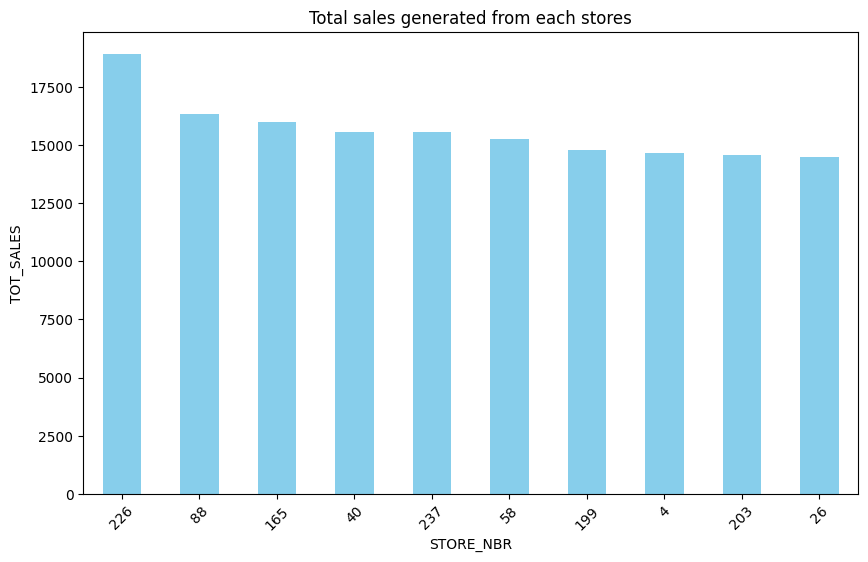

In [ ]:
# Total sales generated from each stores
plt.figure(figsize=(10, 6))
STORE_SALES.nlargest(10).plot(kind="bar", color="skyblue")
plt.xlabel("STORE_NBR")
plt.ylabel("TOT_SALES")
plt.title("Total sales generated from each stores")
plt.xticks(rotation=45)
plt.show()

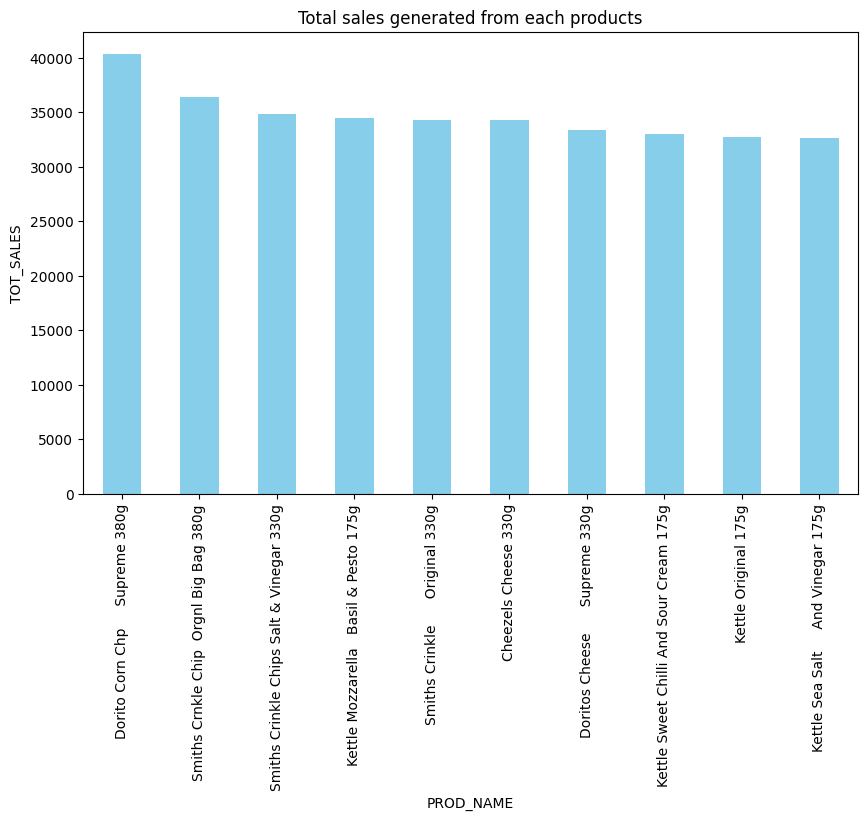

In [ ]:
# Total sales generated from each products
plt.figure(figsize=(10, 6))
PROD_SALES.nlargest(10).plot(kind="bar", color="skyblue")
plt.xlabel("PROD_NAME")
plt.ylabel("TOT_SALES")
plt.title("Total sales generated from each products")
plt.xticks(rotation=90)
plt.show()

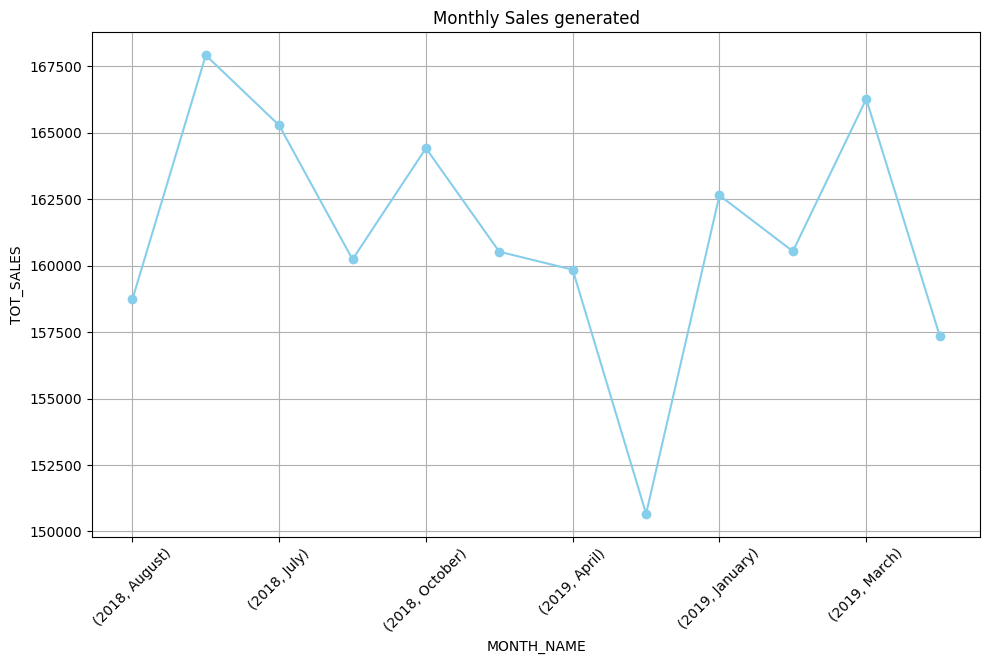

In [ ]:
# Monthly Sales generated
plt.figure(figsize=(10, 6))
MONTHLY_SALES.plot(kind="line", color="skyblue", marker="o")
plt.xlabel("MONTH_NAME")
plt.ylabel("TOT_SALES")
plt.title("Monthly Sales generated")
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

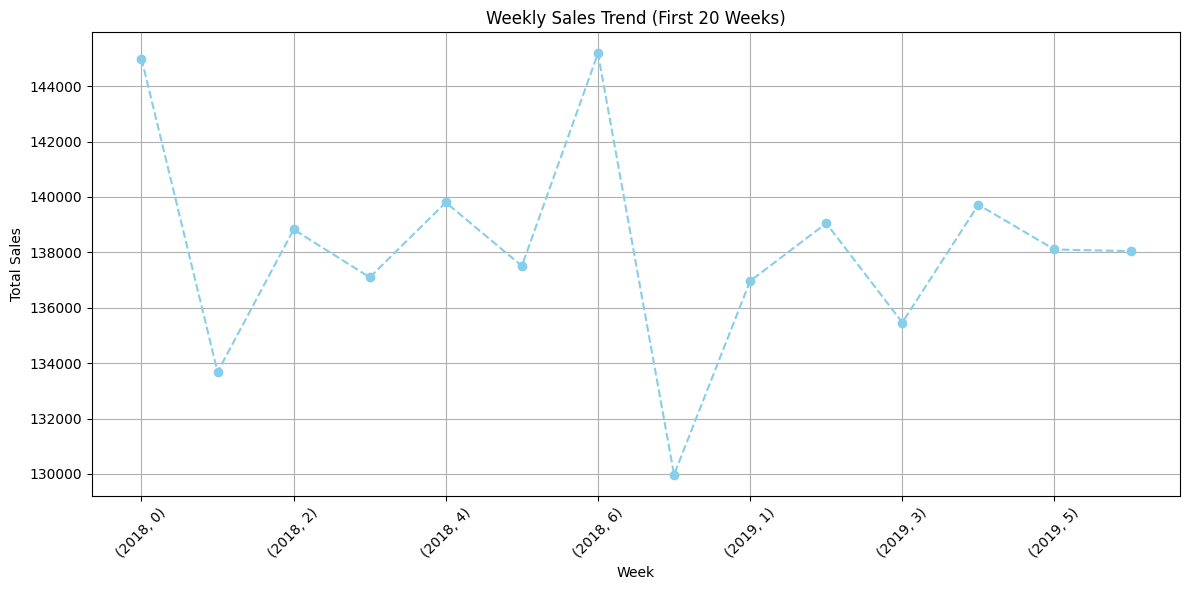

In [ ]:
plt.figure(figsize=(12, 6))
WEEKLY_SALES.head(20).plot(marker='o', linestyle='--', color='skyblue')
plt.title('Weekly Sales Trend (First 20 Weeks)')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# **Customer Analysis**

In [ ]:
# Merging two diff datasets for new Customer Data
Customer_Data = pd.merge(df_2, df_1)

In [ ]:
Customer_Data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,STORE_NBR,PROD_NAME,PROD_QTY,TOT_SALES,YEAR,MONTH_NAME,WEEK
0,1000,YOUNG SINGLES/COUPLES,Premium,1,Natural Chip Compny SeaSalt175g,2,6.0,2018,October,2
1,1002,YOUNG SINGLES/COUPLES,Mainstream,1,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,2018,September,6
2,1003,YOUNG FAMILIES,Budget,1,Grain Waves Sour Cream&Chives 210G,1,3.6,2019,March,3
3,1003,YOUNG FAMILIES,Budget,1,Natural ChipCo Hony Soy Chckn175g,1,3.0,2019,March,4
4,1004,OLDER SINGLES/COUPLES,Mainstream,1,WW Original Stacked Chips 160g,1,1.9,2018,November,4


In [ ]:
Customer_Data.drop(columns=["DATE", "TXN_ID", "PROD_NBR"], inplace=True)

In [ ]:
# Create a Transaction Count column which includes Lifestage & Premium customer.
TRANSACTION_COUNT = Customer_Data.groupby(["PREMIUM_CUSTOMER", "LIFESTAGE"]).size().reset_index(name="TRANSACTION_COUNT")

In [ ]:
TRANSACTION_COUNT.head()

,PREMIUM_CUSTOMER,LIFESTAGE,TRANSACTION_COUNT
0,Budget,MIDAGE SINGLES/COUPLES,5020
1,Budget,NEW FAMILIES,3005
2,Budget,OLDER FAMILIES,23160
3,Budget,OLDER SINGLES/COUPLES,18407
4,Budget,RETIREES,15201


In [ ]:
# Investigating Unique Customer
UNIQUE_CUSTOMER = Customer_Data.groupby(["PREMIUM_CUSTOMER", "LIFESTAGE"])["LYLTY_CARD_NBR"].nunique().reset_index(name="UNIQUE_COUNT")
UNIQUE_CUSTOMER.head()

,PREMIUM_CUSTOMER,LIFESTAGE,UNIQUE_COUNT
0,Budget,MIDAGE SINGLES/COUPLES,1504
1,Budget,NEW FAMILIES,1112
2,Budget,OLDER FAMILIES,4675
3,Budget,OLDER SINGLES/COUPLES,4929
4,Budget,RETIREES,4454


In [ ]:
# Total revenue generated from both columns i.e., Premium Csutomer & Lifestage
TOTAL_REVENUE = Customer_Data.groupby(["PREMIUM_CUSTOMER", "LIFESTAGE"])["TOT_SALES"].sum().reset_index(name="TOTAL_REVENUE")
TOTAL_REVENUE.head()

,PREMIUM_CUSTOMER,LIFESTAGE,TOTAL_REVENUE
0,Budget,MIDAGE SINGLES/COUPLES,35514.80
1,Budget,NEW FAMILIES,21928.45
2,Budget,OLDER FAMILIES,168363.25
3,Budget,OLDER SINGLES/COUPLES,136769.80
4,Budget,RETIREES,113147.80


In [ ]:
TOTAL_REVENUE[TOTAL_REVENUE["PREMIUM_CUSTOMER"]=="Mainstream"].sort_values(by="TOTAL_REVENUE", ascending=False)

,PREMIUM_CUSTOMER,LIFESTAGE,TOTAL_REVENUE
13,Mainstream,YOUNG SINGLES/COUPLES,157621.60
11,Mainstream,RETIREES,155677.05
10,Mainstream,OLDER SINGLES/COUPLES,133393.80
9,Mainstream,OLDER FAMILIES,103445.55
12,Mainstream,YOUNG FAMILIES,92788.75
7,Mainstream,MIDAGE SINGLES/COUPLES,90803.85
8,Mainstream,NEW FAMILIES,17013.90


In [ ]:
# Most Popular Chips Brand among diff types of customers
POP_CHIPS = Customer_Data.groupby(["PREMIUM_CUSTOMER", "LIFESTAGE", "PROD_NAME"])["PROD_QTY"].sum().reset_index()
POP_CHIPS.head()

,PREMIUM_CUSTOMER,LIFESTAGE,PROD_NAME,PROD_QTY
0,Budget,MIDAGE SINGLES/COUPLES,Burger Rings 220g,84
1,Budget,MIDAGE SINGLES/COUPLES,CCs Nacho Cheese 175g,75
2,Budget,MIDAGE SINGLES/COUPLES,CCs Original 175g,53
3,Budget,MIDAGE SINGLES/COUPLES,CCs Tasty Cheese 175g,77
4,Budget,MIDAGE SINGLES/COUPLES,Cheetos Chs & Bacon Balls 190g,48


In [ ]:
TOP_CHIPS = POP_CHIPS.sort_values(["PREMIUM_CUSTOMER", "LIFESTAGE", "PROD_QTY"], ascending=[True, True, False])
TOP_CHIPS

,PREMIUM_CUSTOMER,LIFESTAGE,PROD_NAME,PROD_QTY
29,Budget,MIDAGE SINGLES/COUPLES,Infzns Crn Crnchers Tangy Gcamole 110g,147
15,Budget,MIDAGE SINGLES/COUPLES,Doritos Corn Chips Cheese Supreme 170g,141
42,Budget,MIDAGE SINGLES/COUPLES,Kettle Tortilla ChpsHny&Jlpno Chili 150g,135
101,Budget,MIDAGE SINGLES/COUPLES,Twisties Chicken270g,135
92,Budget,MIDAGE SINGLES/COUPLES,Thins Chips Light& Tangy 175g,134
...,...,...,...,...
2284,Premium,YOUNG SINGLES/COUPLES,Cheetos Chs & Bacon Balls 190g,59
2326,Premium,YOUNG SINGLES/COUPLES,Natural ChipCo Hony Soy Chckn175g,58
2367,Premium,YOUNG SINGLES/COUPLES,Smiths Thinly Swt Chli&S/Cream175G,57
2342,Premium,YOUNG SINGLES/COUPLES,RRD Pc Sea Salt 165g,53


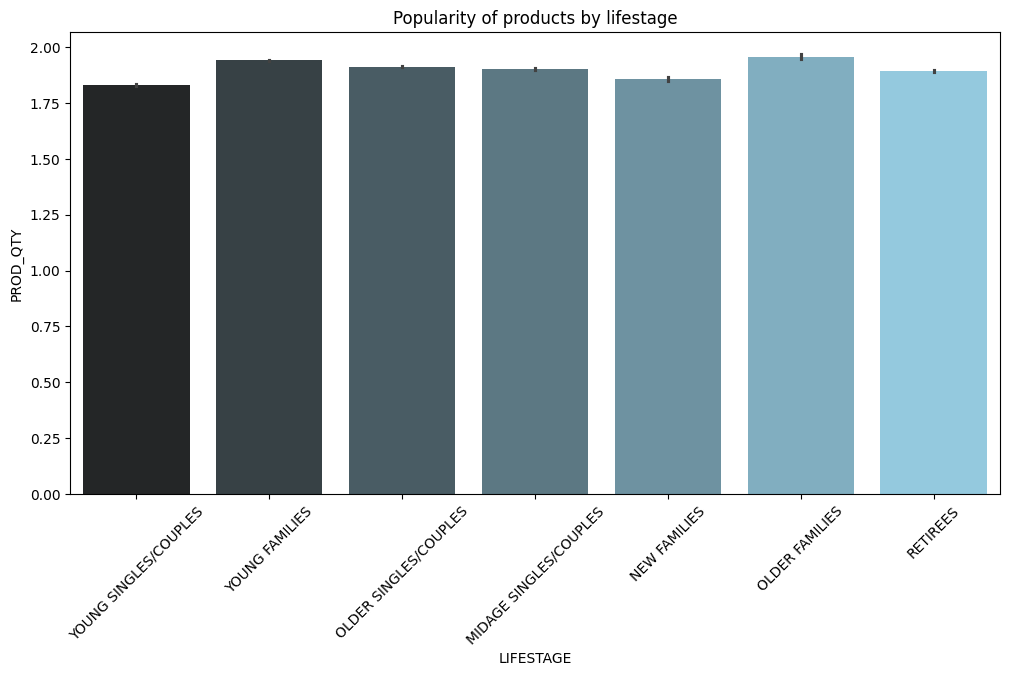

In [ ]:
# Visualize Popularity of products by lifestage
plt.figure(figsize=(12, 6))
sns.barplot(Customer_Data, x="LIFESTAGE", y="PROD_QTY", hue="LIFESTAGE", legend=False, palette="dark:skyblue")
plt.xlabel("LIFESTAGE")
plt.ylabel("PROD_QTY")
plt.title("Popularity of products by lifestage")
plt.xticks(rotation=45)
plt.show()

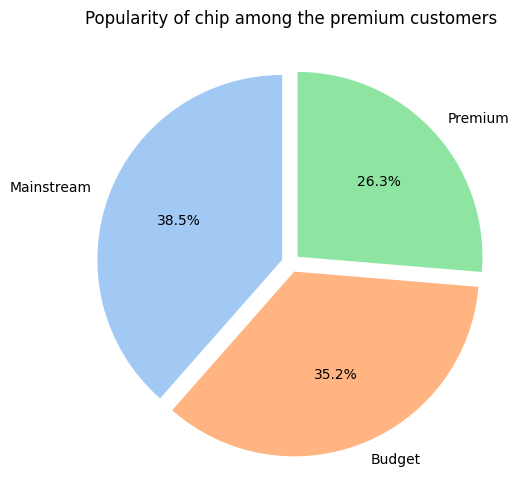

In [ ]:
premium_customer = Customer_Data["PREMIUM_CUSTOMER"].value_counts()
# Visualize No of premium customers
plt.figure(figsize=(12, 6))
plt.pie(premium_customer, labels=premium_customer.index, autopct="%1.1f%%", explode = [0.05] * len(premium_customer), startangle=90, colors=sns.color_palette("pastel"))
plt.title("Popularity of chip among the premium customers")
plt.show()

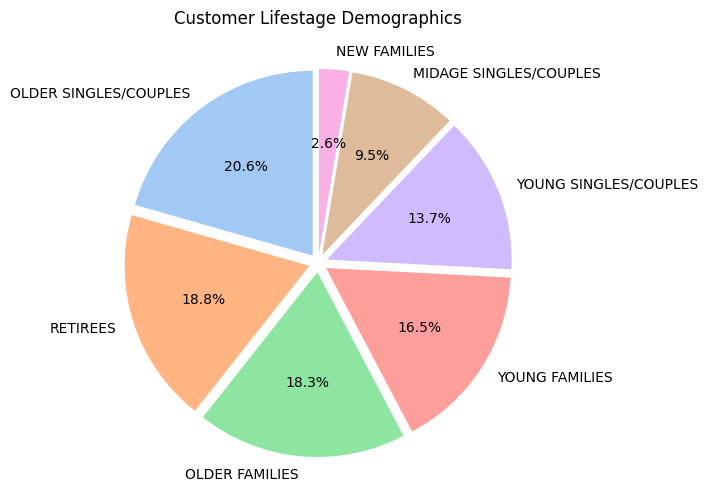

In [ ]:
lifestage = Customer_Data["LIFESTAGE"].value_counts()
# Visualize
plt.figure(figsize=(12, 6))
plt.pie(lifestage, labels=lifestage.index, autopct="%1.1f%%", explode = [0.05] * len(lifestage), startangle=90, colors=sns.color_palette("pastel"))
plt.title("Customer Lifestage Demographics")
plt.show()

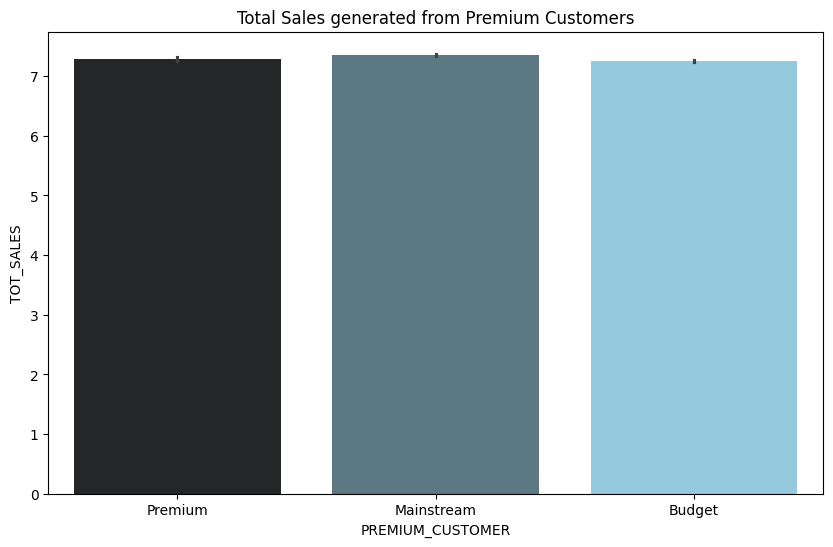

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(Customer_Data, x="PREMIUM_CUSTOMER", y="TOT_SALES", hue="PREMIUM_CUSTOMER", legend=False, palette="dark:skyblue")
plt.xlabel("PREMIUM_CUSTOMER")
plt.ylabel("TOT_SALES")
plt.title("Total Sales generated from Premium Customers")
plt.show()